In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/divorce/divorce-csv.csv'
df= pd.read_csv(url)
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [0]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [4]:
x=df.loc[:,df.columns !='Class']
y=df.Class
x.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=50)

In [0]:
clf=DecisionTreeClassifier()

In [0]:
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy: 1.0


[Text(209.25, 190.26, 'X[16] <= 1.5\ngini = 0.5\nsamples = 102\nvalue = [51, 51]'),
 Text(167.4, 135.9, 'X[39] <= 1.5\ngini = 0.105\nsamples = 54\nvalue = [51, 3]'),
 Text(83.7, 81.53999999999999, 'X[25] <= 1.5\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[13] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]')]

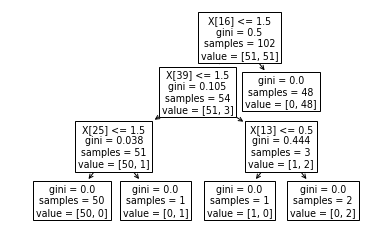

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
tree.plot_tree(clf.fit(X_train,y_train))

In [0]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [10]:
pip install graphviz

In [11]:
pip install pydotplus

In [12]:
# Export our trained model as a .dot file
for x in list(range(1,21)):
  with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth =x,
                              impurity = True,
                              feature_names = list(df.drop(['Class'], axis=1)),
                              class_names = ['Potential divorce', 'Healthy Marriage'],
                              rounded = True,
                              filled= True )

#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])



0

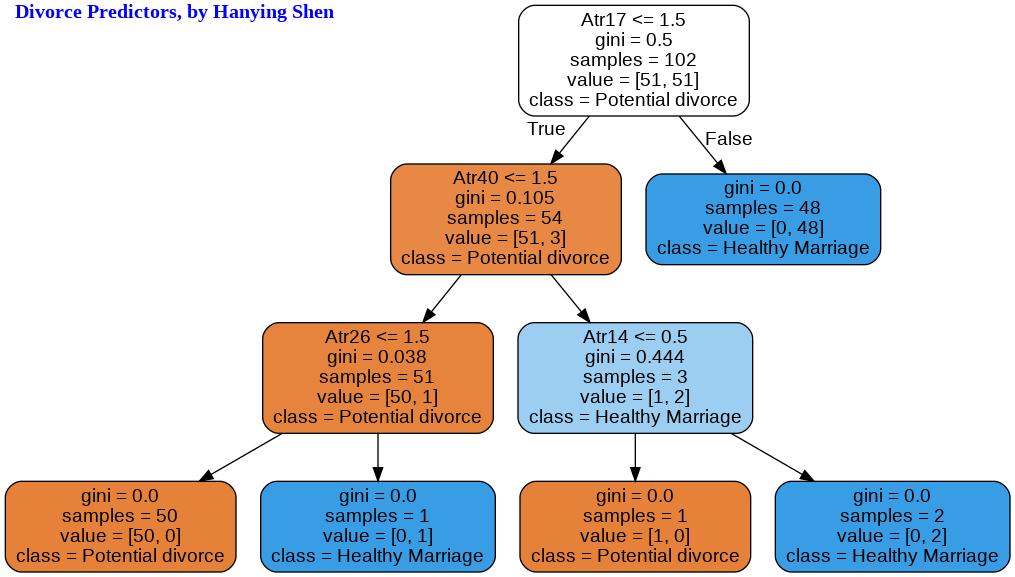

In [13]:
# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 20)
draw.text((15, 0), # Drawing offset (position)
          'Divorce Predictors, by Hanying Shen', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")